In [9]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score


ModuleNotFoundError: No module named 'numpy'

In [6]:
df = pd.read_csv("Datasets/E-commerce Customer Behavior.csv")

NameError: name 'pd' is not defined

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
test = df.sample(12)
test

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
97,198,Male,34,Los Angeles,Silver,800.20,11,4.1,False,17,Neutral
105,206,Male,28,San Francisco,Gold,1490.10,21,4.9,False,9,Satisfied
181,282,Male,34,Los Angeles,Silver,790.20,11,4.0,False,15,Neutral
340,441,Female,37,Houston,Bronze,450.80,7,3.4,False,32,Neutral
258,359,Male,35,Los Angeles,Silver,810.90,12,4.3,False,14,Neutral
227,328,Female,31,New York,Gold,1140.60,15,4.5,True,27,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
110,211,Female,43,Chicago,Bronze,505.75,10,3.3,True,39,Unsatisfied
220,321,Female,36,Houston,Bronze,470.50,8,3.0,False,18,Neutral
28,129,Male,32,Miami,Silver,670.30,10,3.8,True,33,Unsatisfied


In [5]:
test = test.iloc[:,:-1]
test

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
97,198,Male,34,Los Angeles,Silver,800.20,11,4.1,False,17
105,206,Male,28,San Francisco,Gold,1490.10,21,4.9,False,9
181,282,Male,34,Los Angeles,Silver,790.20,11,4.0,False,15
340,441,Female,37,Houston,Bronze,450.80,7,3.4,False,32
258,359,Male,35,Los Angeles,Silver,810.90,12,4.3,False,14
227,328,Female,31,New York,Gold,1140.60,15,4.5,True,27
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21
110,211,Female,43,Chicago,Bronze,505.75,10,3.3,True,39
220,321,Female,36,Houston,Bronze,470.50,8,3.0,False,18
28,129,Male,32,Miami,Silver,670.30,10,3.8,True,33


In [6]:
test.to_csv('Datasets/testdata.csv', index = False)

In [7]:
df.shape

(350, 11)

In [8]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [10]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [13]:
df.duplicated().sum()

0

In [14]:
labels = df['Satisfaction Level'].unique()
labels

array(['Satisfied', 'Neutral', 'Unsatisfied'], dtype=object)

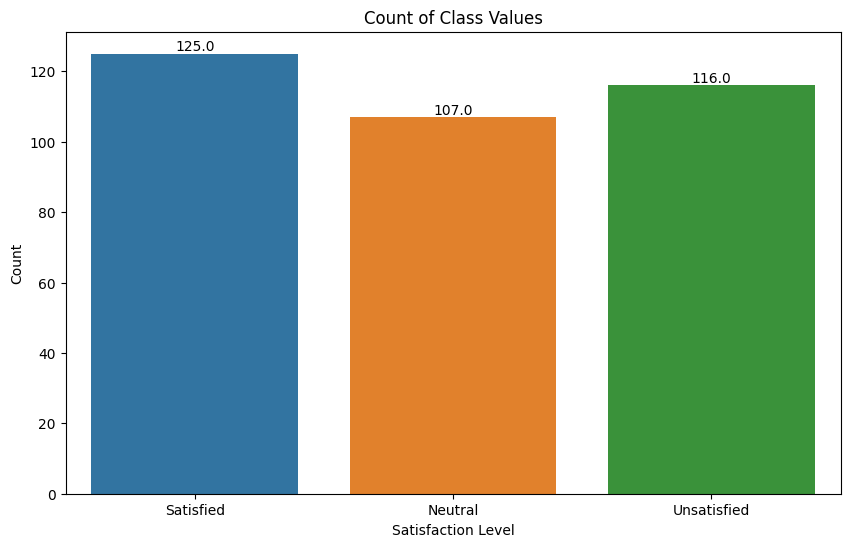

In [15]:
# Create a count plot for the 'Caudal_impulses' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Count of Class Values')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [16]:
df.corr()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
Customer ID,1.000000,0.013900,-0.010860,-0.008469,-0.006173,-0.004567,0.116709
Age,0.013900,1.000000,-0.676826,-0.684397,-0.721752,0.061262,0.170437
Total Spend,-0.010860,-0.676826,1.000000,0.972276,0.941190,-0.168530,-0.544679
Items Purchased,-0.008469,-0.684397,0.972276,1.000000,0.921396,-0.123037,-0.425425
Average Rating,-0.006173,-0.721752,0.941190,0.921396,1.000000,-0.076756,-0.435921
Discount Applied,-0.004567,0.061262,-0.168530,-0.123037,-0.076756,1.000000,0.760032
Days Since Last Purchase,0.116709,0.170437,-0.544679,-0.425425,-0.435921,0.760032,1.000000


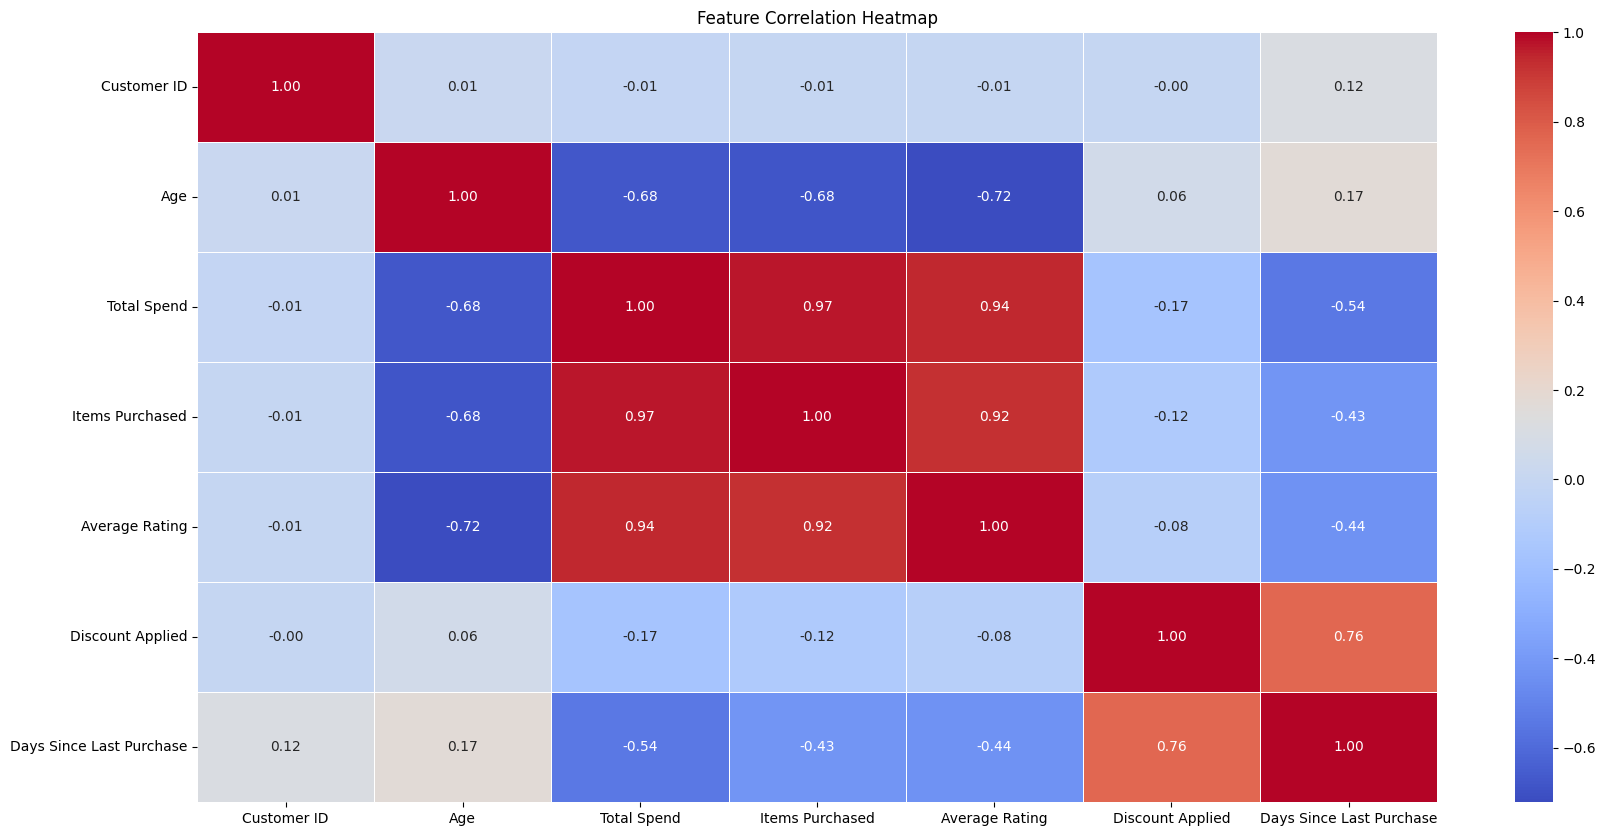

In [17]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Show the plot
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
object_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [19]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,True,25,1
1,102,1,34,2,2,780.50,11,4.1,False,18,0
2,103,0,43,0,0,510.75,9,3.4,True,42,2
3,104,1,30,5,1,1480.30,19,4.7,False,12,1
4,105,1,27,3,2,720.40,13,4.0,True,55,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,660.30,10,3.8,True,42,2
346,447,0,36,1,0,470.50,8,3.0,False,27,0
347,448,0,30,4,1,1190.80,16,4.5,True,28,1
348,449,1,34,2,2,780.20,11,4.2,False,21,0


In [20]:
X = df.drop(['Customer ID', 'Satisfaction Level'], axis = 1)
X

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,0,29,4,1,1120.20,14,4.6,True,25
1,1,34,2,2,780.50,11,4.1,False,18
2,0,43,0,0,510.75,9,3.4,True,42
3,1,30,5,1,1480.30,19,4.7,False,12
4,1,27,3,2,720.40,13,4.0,True,55
...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,True,42
346,0,36,1,0,470.50,8,3.0,False,27
347,0,30,4,1,1190.80,16,4.5,True,28
348,1,34,2,2,780.20,11,4.2,False,21


In [21]:
y = df['Satisfaction Level']
y

0      1
1      0
2      2
3      1
4      2
      ..
345    2
346    0
347    1
348    0
349    2
Name: Satisfaction Level, Length: 348, dtype: int32

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=77 )

In [23]:
X_train.shape

(278, 9)

In [24]:
X_test.shape

(70, 9)

In [25]:
labels = ['Satisfied', 'Neutral', 'Unsatisfied']
labels

['Satisfied', 'Neutral', 'Unsatisfied']

In [26]:
precision = []
recall = []
fscore = []
accuracy = []

In [27]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Logistic Regression model loaded successfully.
Logistic Regression Accuracy    : 97.14285714285714
Logistic Regression Precision   : 97.21739130434783
Logistic Regression Recall      : 97.21739130434783
Logistic Regression FSCORE      : 97.21739130434783

 Logistic Regression classification report
               precision    recall  f1-score   support

   Satisfied       0.96      0.96      0.96        25
     Neutral       0.96      0.96      0.96        23
 Unsatisfied       1.00      1.00      1.00        22

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



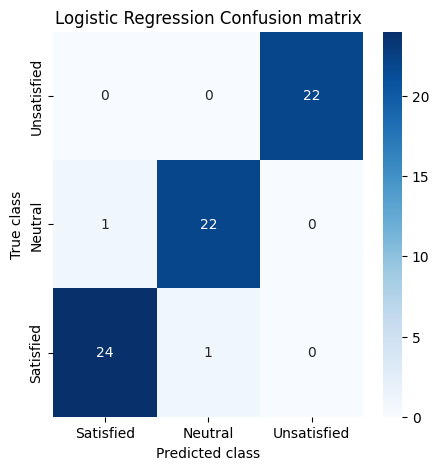

In [28]:
from sklearn.linear_model import LogisticRegression
import joblib
import os

# Check if the model exists, and load it or train a new one
if os.path.exists('model/LogisticRegression.pkl'):
    lr = joblib.load('model/LogisticRegression.pkl')
    print("Logistic Regression model loaded successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)
else:
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    joblib.dump(lr, 'model/LogisticRegression.pkl')
    print("Logistic Regression model saved successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)


SVC model loaded successfully.
SVC Accuracy    : 60.0
SVC Precision   : 62.31884057971014
SVC Recall      : 48.0
SVC FSCORE      : 51.37812230835487

 SVC classification report
               precision    recall  f1-score   support

   Satisfied       0.00      0.00      0.00        25
     Neutral       1.00      0.87      0.93        23
 Unsatisfied       0.44      1.00      0.61        22

    accuracy                           0.60        70
   macro avg       0.48      0.62      0.51        70
weighted avg       0.47      0.60      0.50        70



c:\Users\surya\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\surya\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\surya\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

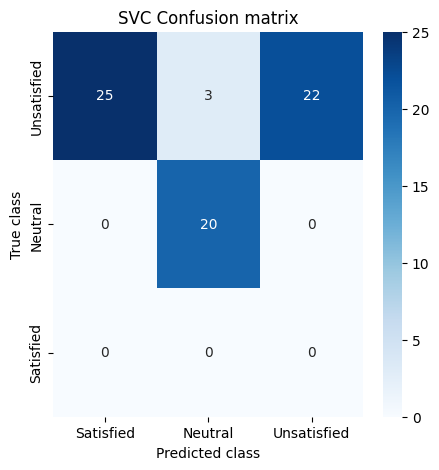

In [ ]:
from sklearn.svm import SVC
import joblib
import os

if os.path.exists('model/svc.pkl'):
    lr = joblib.load('model/svc.pkl')
    print("SVC model loaded successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("SVC", predict, y_test)
else:
    lr = SVC()
    lr.fit(X_train, y_train)
    joblib.dump(lr, 'model/svc.pkl')
    print("SVC model saved successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("SVC", predict, y_test)


In [30]:
test = pd.read_csv('Datasets/testdata.csv')
test

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,198,Male,34,Los Angeles,Silver,800.20,11,4.1,False,17
1,206,Male,28,San Francisco,Gold,1490.10,21,4.9,False,9
2,282,Male,34,Los Angeles,Silver,790.20,11,4.0,False,15
3,441,Female,37,Houston,Bronze,450.80,7,3.4,False,32
4,359,Male,35,Los Angeles,Silver,810.90,12,4.3,False,14
5,328,Female,31,New York,Gold,1140.60,15,4.5,True,27
6,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21
7,211,Female,43,Chicago,Bronze,505.75,10,3.3,True,39
8,321,Female,36,Houston,Bronze,470.50,8,3.0,False,18
9,129,Male,32,Miami,Silver,670.30,10,3.8,True,33


In [31]:
object_cols = test.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_cols:
    test[col] = label_encoder.fit_transform(test[col].astype(str))

In [32]:
test = test.drop(['Customer ID'], axis = 1)
test

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,1,34,2,2,800.20,11,4.1,False,17
1,1,28,5,1,1490.10,21,4.9,False,9
2,1,34,2,2,790.20,11,4.0,False,15
3,0,37,1,0,450.80,7,3.4,False,32
4,1,35,2,2,810.90,12,4.3,False,14
5,0,31,4,1,1140.60,15,4.5,True,27
6,1,34,2,2,780.20,11,4.2,False,21
7,0,43,0,0,505.75,10,3.3,True,39
8,0,36,1,0,470.50,8,3.0,False,18
9,1,32,3,2,670.30,10,3.8,True,33


In [33]:
predict = lr.predict(test)
predict

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1])

In [34]:
test['predication'] = [labels[pred] for pred in predict]
test

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,predication
0,1,34,2,2,800.20,11,4.1,False,17,Unsatisfied
1,1,28,5,1,1490.10,21,4.9,False,9,Neutral
2,1,34,2,2,790.20,11,4.0,False,15,Unsatisfied
3,0,37,1,0,450.80,7,3.4,False,32,Unsatisfied
4,1,35,2,2,810.90,12,4.3,False,14,Unsatisfied
5,0,31,4,1,1140.60,15,4.5,True,27,Neutral
6,1,34,2,2,780.20,11,4.2,False,21,Unsatisfied
7,0,43,0,0,505.75,10,3.3,True,39,Unsatisfied
8,0,36,1,0,470.50,8,3.0,False,18,Unsatisfied
9,1,32,3,2,670.30,10,3.8,True,33,Unsatisfied
